In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt


In [8]:
#Q1
#dataset: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
# Load the dataset
data = pd.read_csv('cardio_train.csv',sep=";").sample(n=2000, random_state=42)

data.head
data.columns = data.columns.str.strip()
print(data.columns.tolist())
print(data["age"].head())
print(data.info())
#dealing age,turning into years
data["age"] = data["age"] // 365
# Encode categorical variables
categorical_cols = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
# Standardize numerical variables
scaler = StandardScaler()
numerical_cols = ["age", "height", "weight", "ap_hi", "ap_lo"]
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
# Define features and target
X = data.drop(columns=["id", "cardio"])
y = data["cardio"]
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Add an intercept to the features
X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
n_features = X_train.shape[1]
with pm.Model() as logistic_model:
    # Priors for coefficients
    betas = pm.Normal('betas', mu=0, sigma=1, shape=n_features)
    # Linear combination
    linear_combination = pm.math.dot(X_train, betas)
    #Likelihood with logit link
    theta = pm.Deterministic('theta', pm.math.sigmoid(linear_combination))
    y_obs = pm.Bernoulli('y_obs', p=theta, observed=y_train)
    # Sample from the posterior
    trace = pm.sample(1000, tune=1000, cores=2, random_seed=40,target_accept=0.95)


['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
46730    21770
48393    21876
41416    23270
34506    19741
43725    18395
Name: age, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 46730 to 39820
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2000 non-null   int64  
 1   age          2000 non-null   int64  
 2   gender       2000 non-null   int64  
 3   height       2000 non-null   int64  
 4   weight       2000 non-null   float64
 5   ap_hi        2000 non-null   int64  
 6   ap_lo        2000 non-null   int64  
 7   cholesterol  2000 non-null   int64  
 8   gluc         2000 non-null   int64  
 9   smoke        2000 non-null   int64  
 10  alco         2000 non-null   int64  
 11  active       2000 non-null   int64  
 12  cardio       2000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage

Output()

ERROR:pymc.stats.convergence:There were 44 divergences after tuning. Increase `target_accept` or reparameterize.


              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]     0.284  0.132   0.052    0.538      0.003    0.003    1469.0   
betas[1]     0.347  0.058   0.241    0.456      0.001    0.001    2670.0   
betas[2]     0.056  0.143  -0.194    0.340      0.003    0.003    1684.0   
betas[3]    -0.096  0.069  -0.224    0.035      0.002    0.001    1826.0   
betas[4]     0.351  0.064   0.226    0.469      0.002    0.001    1798.0   
...            ...    ...     ...      ...        ...      ...       ...   
theta[1595]  0.116  0.022   0.075    0.156      0.000    0.000    2059.0   
theta[1596]  0.813  0.031   0.752    0.866      0.001    0.001    1804.0   
theta[1597]  0.087  0.015   0.060    0.116      0.000    0.000    2741.0   
theta[1598]  0.115  0.029   0.067    0.171      0.001    0.000    2328.0   
theta[1599]  0.412  0.026   0.367    0.463      0.001    0.000    1779.0   

             ess_tail  r_hat  
betas[0]       1439.0    1.0  
betas[1]       1623.0    

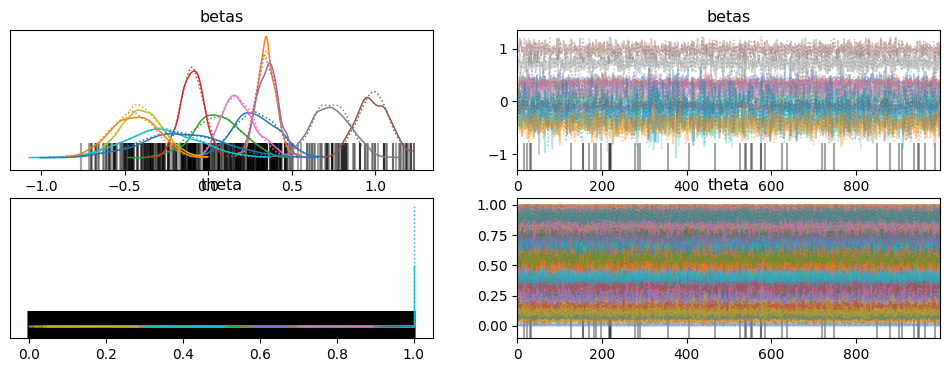

/usr/local/lib/python3.11/dist-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (1612) in plot_posterior, generating only 40 plots
  warnings.warn(


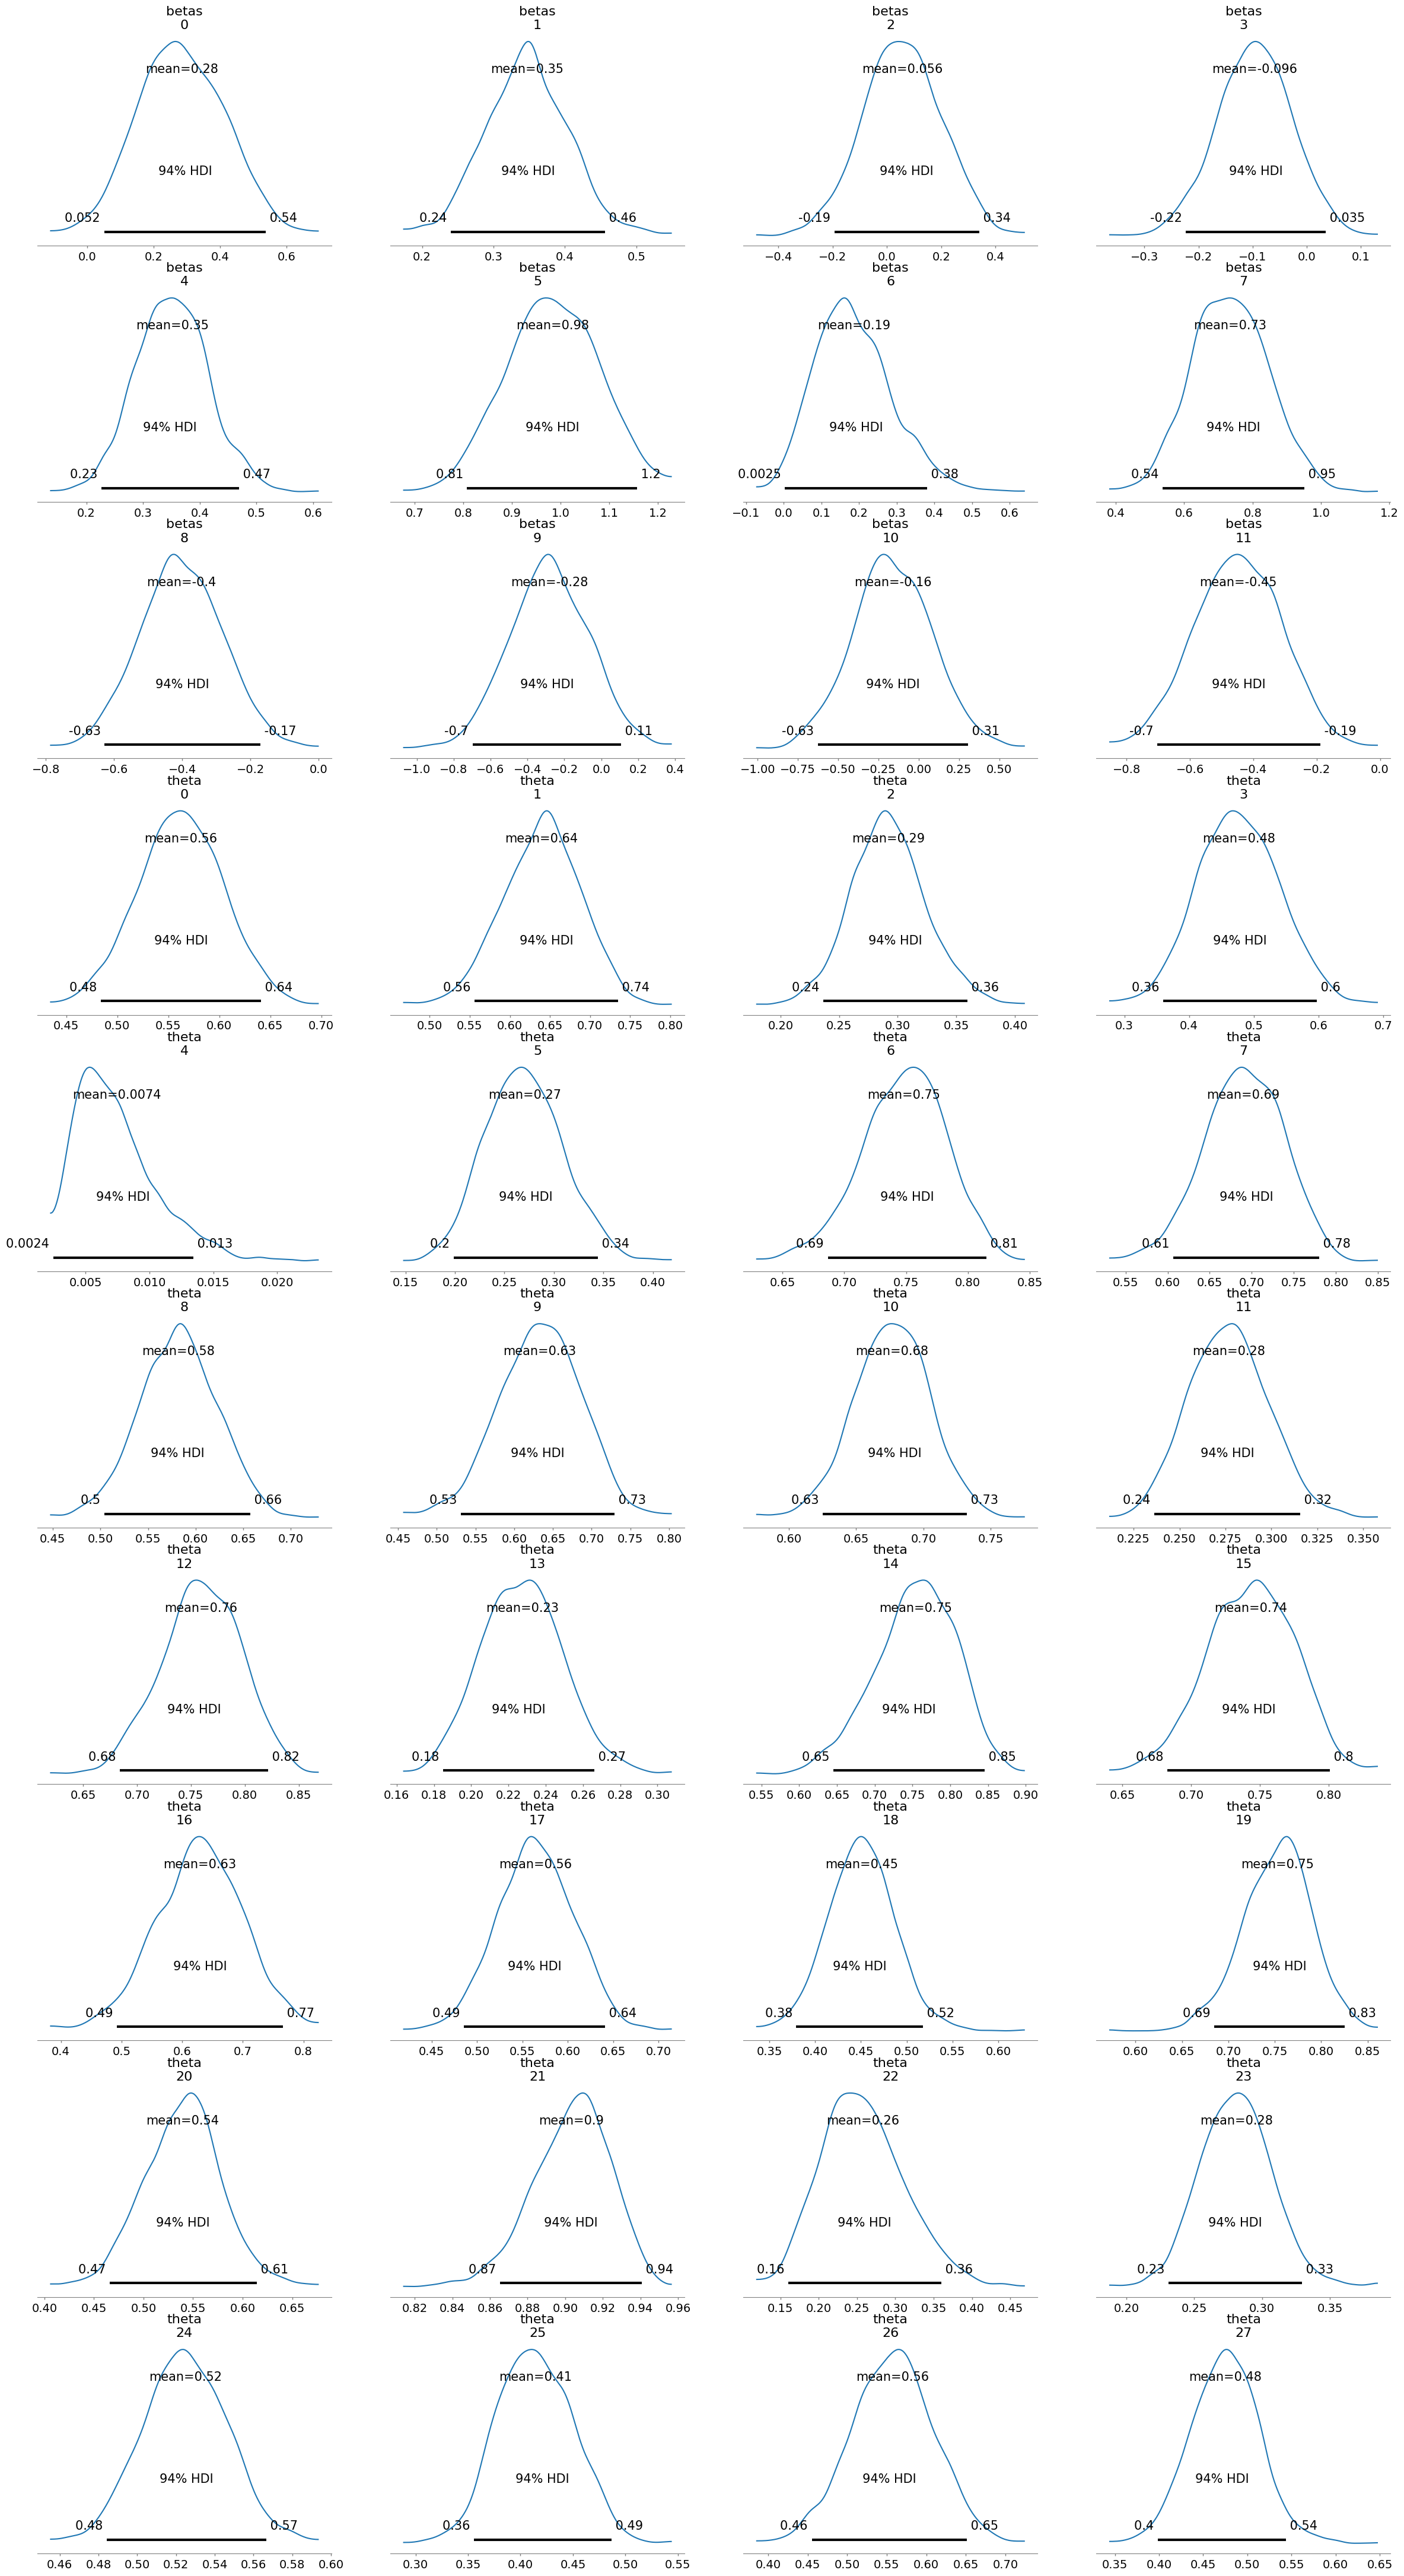

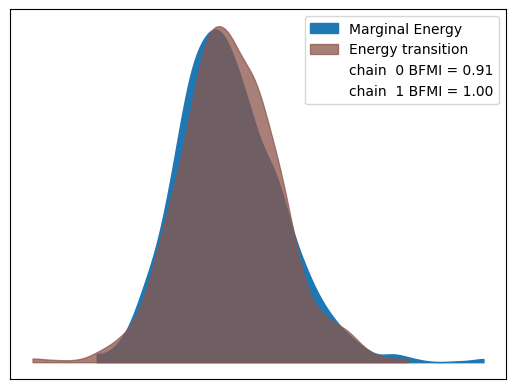

/usr/local/lib/python3.11/dist-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (3224) in plot_autocorr, generating only 40 plots
  warnings.warn(


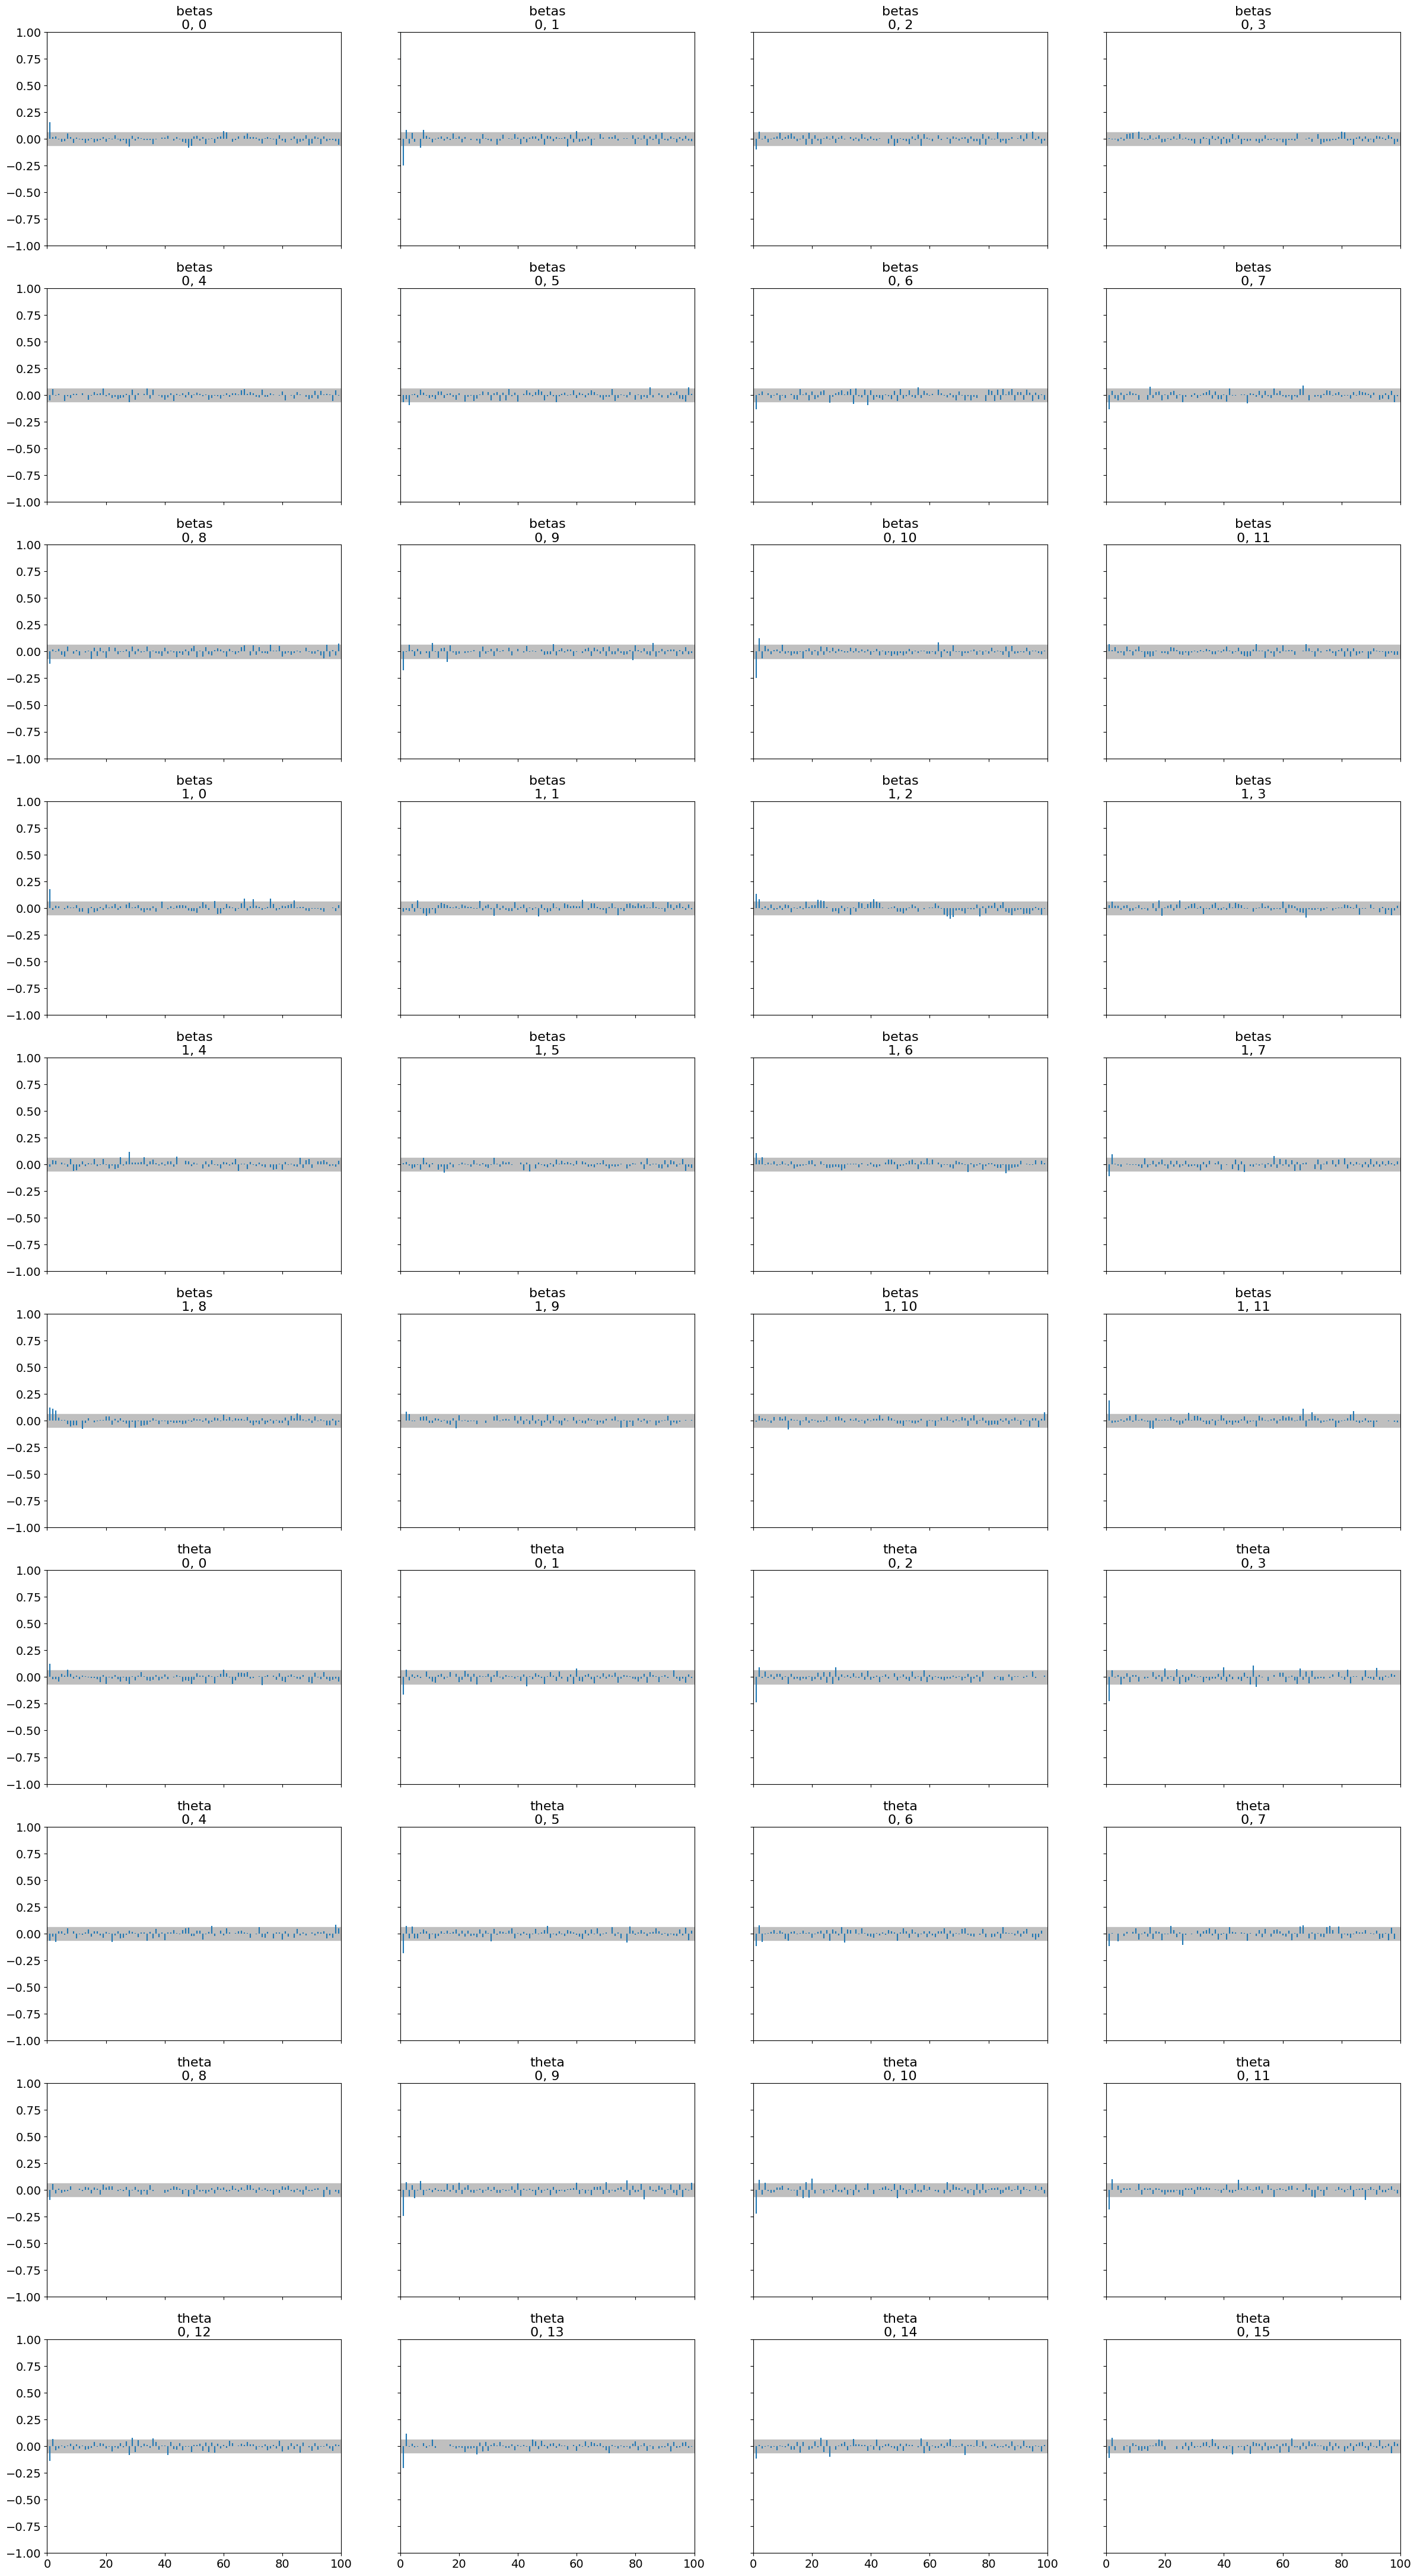

In [9]:
# Summarize the trace
summary = az.summary(trace)
print(summary)

# Plot posterior distributions
az.plot_trace(trace)
plt.show()

az.plot_posterior(trace)
plt.show()

# MCMC diagnostics
az.plot_energy(trace)
plt.show()

az.plot_autocorr(trace)
plt.show()

In [1]:
###note: Q2 and Q3 are in another file